In [151]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

In [152]:
img_path = "images/images (9).jpg"   
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

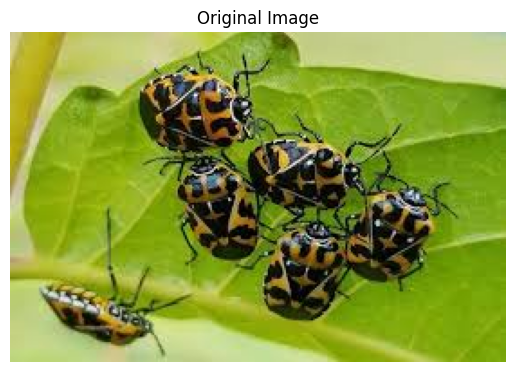

In [153]:
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [154]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)


In [155]:
# reshape image to (num_pixels, 3)
pixel_values = img_lab.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# number of clusters
k = 3   # try 3 or 4


In [156]:
# kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(
    pixel_values,
    k,
    None,
    criteria,
    10,
    cv2.KMEANS_RANDOM_CENTERS
)


In [157]:
# reshape labels back to image
labels = labels.flatten()
segmented_img = centers[labels].reshape(img_lab.shape)
segmented_img = np.uint8(segmented_img)

In [158]:
# convert back to RGB for display
segmented_rgb = cv2.cvtColor(segmented_img, cv2.COLOR_LAB2RGB)

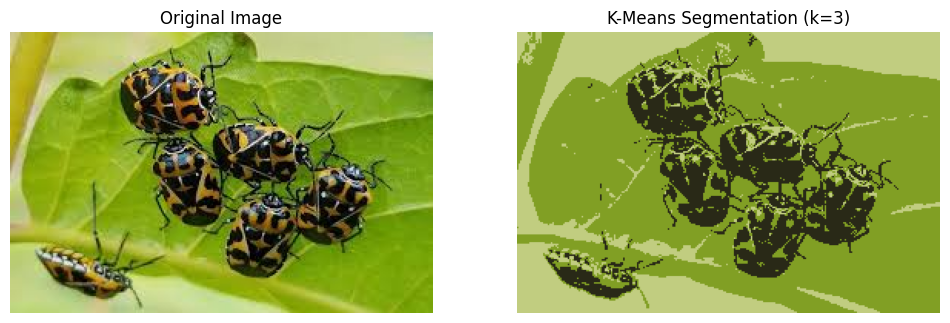

In [159]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_rgb)
plt.title(f"K-Means Segmentation (k={k})")
plt.axis("off")

plt.show()


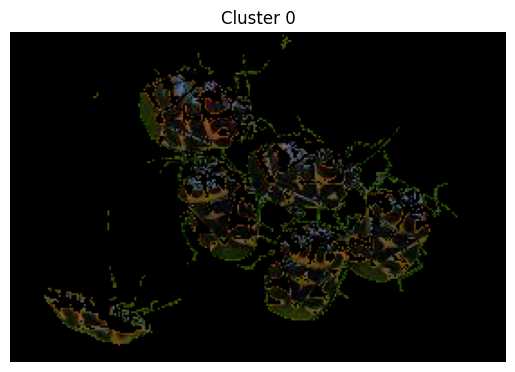

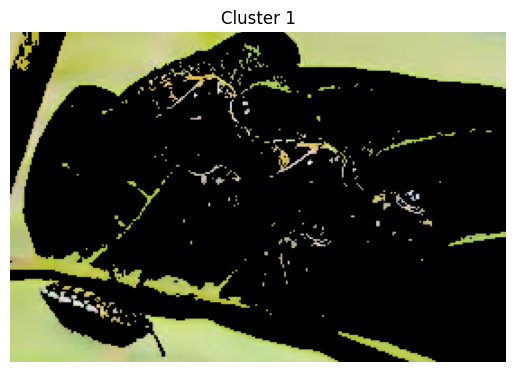

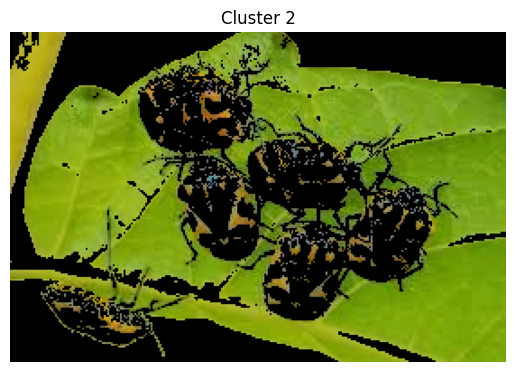

In [160]:
for i in range(k):
    mask = (labels.reshape(img_lab.shape[:2]) == i)

    cluster_img = img_rgb.copy()
    cluster_img[~mask] = 0

    plt.imshow(cluster_img)
    plt.title(f"Cluster {i}")
    plt.axis("off")
    plt.show()


In [161]:
def kmeans_segment(img, k=3):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

    pixel_values = img_lab.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(
        pixel_values,
        k,
        None,
        criteria,
        10,
        cv2.KMEANS_RANDOM_CENTERS
    )

    labels = labels.flatten()
    segmented_img = centers[labels].reshape(img_lab.shape)
    segmented_lab = np.uint8(segmented_img)

    return segmented_lab, labels, img_rgb

In [162]:
input_folders = ["images"] 
output_folder = "output"  

for folder in input_folders:
    out_sub = os.path.join(output_folder, os.path.basename(folder))
    os.makedirs(out_sub, exist_ok=True)

    for file in os.listdir(folder):
        if file.lower().endswith((".jpg", ".png")):
            path = os.path.join(folder, file)
            img = cv2.imread(path)

            segmented_lab, labels, img_rgb = kmeans_segment(img, k=3)
            segmented_rgb = cv2.cvtColor(segmented_lab, cv2.COLOR_LAB2RGB)

            # Reshape labels to image shape
            reshaped_labels = labels.reshape(img.shape[:2])

            # Calculate areas for each cluster
            areas = [np.sum(reshaped_labels == i) for i in range(3)]
            insect_cluster = np.argmin(areas)  # smallest area assumed insect
            leaves_cluster = np.argmax(areas)  # largest area assumed leaves

            # Create mask: 255 for insect, 128 for leaves, 0 for others
            mask = np.zeros_like(reshaped_labels, dtype=np.uint8)
            mask[reshaped_labels == insect_cluster] = 255
            mask[reshaped_labels == leaves_cluster] = 128

            # Create overlay: green for insect, blue for leaves
            overlay = img_rgb.copy()
            overlay[reshaped_labels == insect_cluster] = [0, 255, 0]  # green
            overlay[reshaped_labels == leaves_cluster] = [0, 0, 255]  # blue
            overlay_bgr = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)

            original_bgr = img
            mask_bgr = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
            combined = cv2.hconcat([original_bgr, mask_bgr, overlay_bgr])

            output_filename = file.replace(".jpg", "_combined.jpg").replace(".png", "_combined.png")
            cv2.imwrite(os.path.join(out_sub, output_filename), combined)

            print("Processed:", path)

Processed: images\download (2).jpg
Processed: images\download (3).jpg
Processed: images\download.jpg
Processed: images\images (1).jpg
Processed: images\images (10).jpg
Processed: images\images (11).jpg
Processed: images\images (12).jpg
Processed: images\images (13).jpg
Processed: images\images (14).jpg
Processed: images\images (15).jpg
Processed: images\images (16).jpg
Processed: images\images (17).jpg
Processed: images\images (19).jpg
Processed: images\images (2).jpg
Processed: images\images (22).jpg
Processed: images\images (24).jpg
Processed: images\images (25).jpg
Processed: images\images (26).jpg
Processed: images\images (27).jpg
Processed: images\images (28).jpg
Processed: images\images (29).jpg
Processed: images\images (3).jpg
Processed: images\images (30).jpg
Processed: images\images (32).jpg
Processed: images\images (33).jpg
Processed: images\images (4).jpg
Processed: images\images (5).jpg
Processed: images\images (6).jpg
Processed: images\images (7).jpg
Processed: images\imag